In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Desktop/create.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
124,Male,68.325464,201.258496
125,Male,61.254628,201.985213
126,Female,64.365821,200.654213
127,Female,66.854147,232.154287


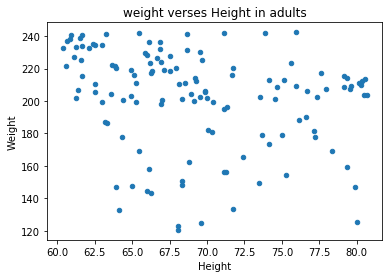

In [4]:
df.plot(kind = 'scatter',
       x= 'Height',
       y= 'Weight',
       title= 'weight verses Height in adults')

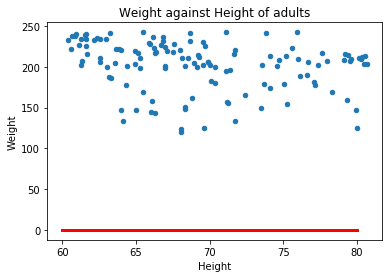

In [5]:
def line(x, w=0, b=0):
    return x*w+b

x = np.linspace(60, 80, 100)
yhat = line(x,w=0, b=0)

df.plot(kind = 'scatter',
       x='Height',
       y='Weight',
       title='Weight against Height of adults')
plt.plot(x, yhat, color='red', linewidth=3)

In [6]:
x

array([60.        , 60.2020202 , 60.4040404 , 60.60606061, 60.80808081,
       61.01010101, 61.21212121, 61.41414141, 61.61616162, 61.81818182,
       62.02020202, 62.22222222, 62.42424242, 62.62626263, 62.82828283,
       63.03030303, 63.23232323, 63.43434343, 63.63636364, 63.83838384,
       64.04040404, 64.24242424, 64.44444444, 64.64646465, 64.84848485,
       65.05050505, 65.25252525, 65.45454545, 65.65656566, 65.85858586,
       66.06060606, 66.26262626, 66.46464646, 66.66666667, 66.86868687,
       67.07070707, 67.27272727, 67.47474747, 67.67676768, 67.87878788,
       68.08080808, 68.28282828, 68.48484848, 68.68686869, 68.88888889,
       69.09090909, 69.29292929, 69.49494949, 69.6969697 , 69.8989899 ,
       70.1010101 , 70.3030303 , 70.50505051, 70.70707071, 70.90909091,
       71.11111111, 71.31313131, 71.51515152, 71.71717172, 71.91919192,
       72.12121212, 72.32323232, 72.52525253, 72.72727273, 72.92929293,
       73.13131313, 73.33333333, 73.53535354, 73.73737374, 73.93

In [7]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

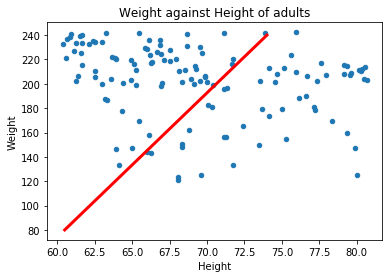

In [8]:
def line(x, w=0, b=0):
    return x*w+b

x = np.linspace(60, 80, 100)
yhat = line(x,w=0, b=0)

df.plot(kind = 'scatter',
       x='Height',
       y='Weight',
       title='Weight against Height of adults')
plt.plot([74,60.5],[240,80], color='red', linewidth = 3)

In [9]:
def mean_squared_error(y_true, y_pred):
    s= (y_true - y_pred)**2
    return s.mean()

In [10]:
x = df[['Height']].values
y_true = df[['Weight']].values

In [11]:
y_pred = line(x)

In [12]:
mean_squared_error(y_true, y_pred)

41670.776742560025

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.
/home/alonso/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alonso/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alonso/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alonso/.local/lib/python3.7/site-packages/tensorflow/python

In [14]:
model = Sequential()

In [15]:
model.add(Dense(1, input_shape = (1,)))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(Adam(lr=0.8), "mean_squared_error")

In [18]:
model.fit(x, y_true, epochs = 50)


Epoch 1/50
129/129 [==============================] - 1s 5ms/step - loss: 11343.1473
Epoch 2/50
129/129 [==============================] - 0s 219us/step - loss: 8790.4365
Epoch 3/50
129/129 [==============================] - 0s 247us/step - loss: 1887.3736
Epoch 4/50
129/129 [==============================] - 0s 259us/step - loss: 5868.4880
Epoch 5/50
129/129 [==============================] - 0s 258us/step - loss: 2179.0515
Epoch 6/50
129/129 [==============================] - 0s 203us/step - loss: 1887.9857
Epoch 7/50
129/129 [==============================] - 0s 248us/step - loss: 1466.3150
Epoch 8/50
129/129 [==============================] - 0s 276us/step - loss: 1556.7725
Epoch 9/50
129/129 [==============================] - 0s 245us/step - loss: 1496.1989
Epoch 10/50
129/129 [==============================] - 0s 185us/step - loss: 1459.1267
Epoch 11/50
129/129 [==============================] - 0s 170us/step - loss: 1464.6121
Epoch 12/50
129/129 [==============================]

In [19]:
y_pred = model.predict(x)

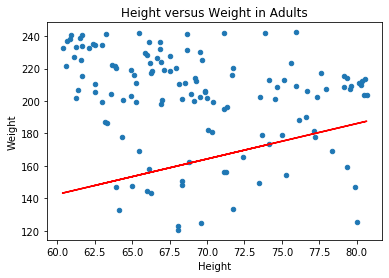

In [20]:
df.plot(kind = 'scatter',
       x = 'Height',
       y = 'Weight',
       title = 'Height versus Weight in Adults')
plt.plot(x, y_pred, color = 'red')

In [21]:
W, B = model.get_weights()

In [22]:
W

array([[2.180951]], dtype=float32)

In [23]:
B

array([11.63782], dtype=float32)

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y_true, test_size = 0.4)

In [28]:
len(x_train)

77

In [29]:
len(x_test)

52

In [30]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [31]:
model.fit(x_train, y_train, epochs = 50, verbose = 0)

In [32]:
y_train_pred = model.predict(x_train).ravel()
y_test_pred = model.predict(x_test).ravel()

In [33]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
print("The mean squared error on the train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The mean squared error on the test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The mean squared error on the train set is:	1513.5
The mean squared error on the test set is:	1468.7


In [35]:
print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

NameError: name 'r2_score' is not defined